In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import tiktoken

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight


In [2]:
wikipedia = pd.read_csv('../../dataset.csv', index_col=0)

wikipedia

,id,url,title,text,category
416,26941,https://en.wikipedia.org/wiki/Spike%20Lee,Spike Lee,"Shelton Jackson ""Spike"" Lee (born March 20, 19...",actors
697,43337,https://en.wikipedia.org/wiki/Katharine%20Hepburn,Katharine Hepburn,"Katharine Houghton Hepburn (May 12, 1907 – Jun...",actors
1168,78127,https://en.wikipedia.org/wiki/James%20Doohan,James Doohan,"James Montgomery Doohan (; March 3, 1920 – Jul...",actors
1317,89695,https://en.wikipedia.org/wiki/William%20Christ...,William Christopher,"William Christopher (October 20, 1932 Decembe...",actors
1442,96406,https://en.wikipedia.org/wiki/Richard%20Greene,Richard Greene,Richard Marius Joseph Greene (25 August 1918 –...,actors
...,...,...,...,...,...
198385,68565885,https://en.wikipedia.org/wiki/1992%20Nigerian%...,1992 Nigerian Senate elections in Delta State,The 1992 Nigerian Senate election in Delta Sta...,events
199111,68862408,https://en.wikipedia.org/wiki/2022%20Valenzuel...,2022 Valenzuela local elections,Local elections will be held in Valenzuela on ...,events
199302,68973980,https://en.wikipedia.org/wiki/Sara%20Bay%20Cla...,Sara Bay Classic,The Sara Bay Classic was a tournament on the S...,events
200401,69486421,https://en.wikipedia.org/wiki/List%20of%20eart...,List of earthquakes in Malaysia,This is a list of earthquakes in Malaysia:\n\n...,events


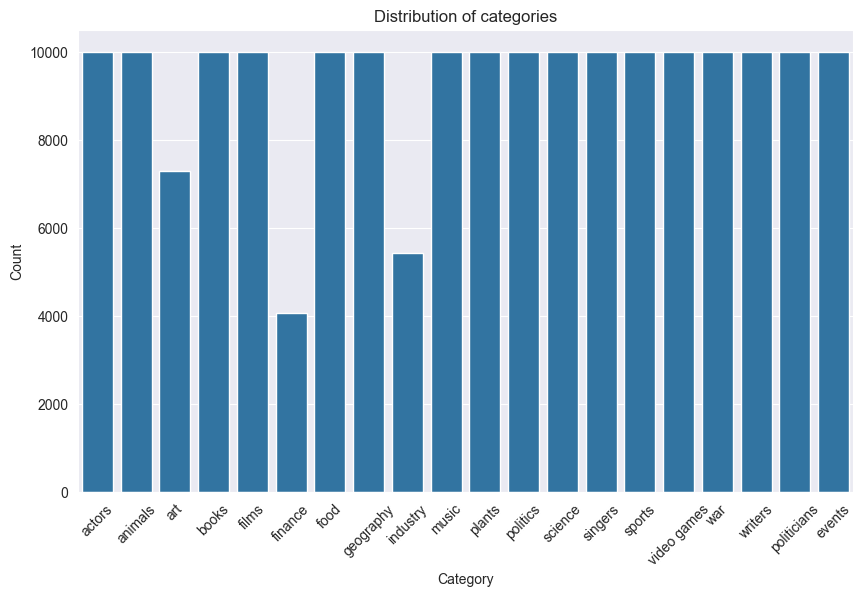

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=wikipedia)

plt.title('Distribution of categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [4]:
wiki = wikipedia.sample(frac=1)

wiki_X = wiki['text']
wiki_y = wiki['category']

X_train, X_test, y_train, y_test = train_test_split(wiki_X, wiki_y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [5]:
model = make_pipeline(CountVectorizer(ngram_range = (1,1)), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Features dimension: (149439, 1028578)
Classification Report:
               precision    recall  f1-score   support

      actors       0.78      0.88      0.82      1981
     animals       0.96      0.87      0.91      1986
         art       0.95      0.91      0.93      1398
       books       0.83      0.76      0.80      1941
      events       0.83      0.41      0.55      1958
       films       0.86      0.98      0.92      2043
     finance       0.83      0.39      0.53       789
        food       0.92      0.55      0.69      2082
   geography       0.71      0.87      0.78      1985
    industry       0.63      0.48      0.55      1004
       music       0.95      0.91      0.93      2071
      plants       0.98      0.95      0.97      2001
 politicians       0.64      0.81      0.71      2037
    politics       0.54      0.74      0.63      2073
     science       0.85      0.88      0.87      1964
     singers       0.76      0.93      0.83      2046
      sports       

Plot Confusion Matrix

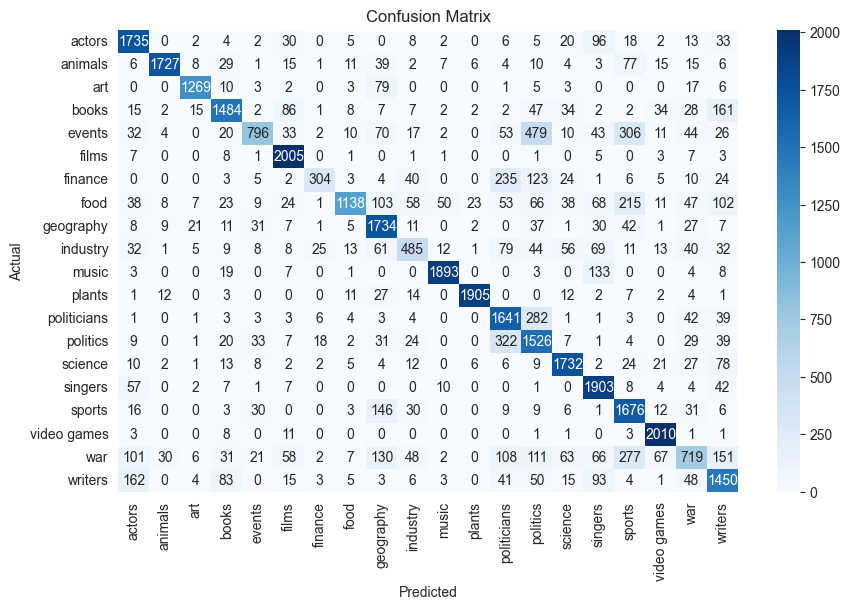

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
test_string = X_test.iloc[20][len(X_test.iloc[20])//2:]

In [9]:
print("With text in half:", model.predict([test_string]))
print("With full text:", model.predict([X_test.iloc[20]]))

With text in half: ['events']
With full text: ['events']


In [10]:
X_test.iloc[20]

"The Livernois–Fenkell riot was a racially motivated riot in the summer of 1975 on Livernois Avenue at Chalfonte Avenue, just south of Fenkell Avenue, in Detroit, Michigan.\n\nRiot\nThe trouble began when Andrew Chinarian, the 39-year-old owner of Bolton's Bar, observed three black youths tampering with his car in the parking lot. He fired a pistol or rifle, fatally wounding 18 year old Obie Wynn. According to some accounts, Wynn was fleeing; according to others, he was approaching Chinarian with what the latter thought was a weapon, it later emerged that Wynn was holding a screwdriver. He died from a gun wound to the back of the head.  Crowds gathered and random acts of vandalism, assault looting and racial fighting along Livernois and Fenkell avenues ensued. Bottles and rocks were thrown at passing cars. \n\nThe second fatality was Marian Pyszko, a 54-year-old dishwasher and a Nazi concentration-camp survivor who had emigrated from Poland in 1958. As he drove home from the bakery/can

In [11]:
y_test.iloc[20]

'events'

In [22]:
from collections import Counter

count_c = Counter(y_train)

priors = {k:v/len(y_train) for k, v in count_c.items()}
print(priors)

train_strings = " ".join(X_train)
train_tokens = word_tokenize(train_strings)
vocabulary = set(train_tokens)
V = len(vocabulary)
classes = set(y_train)

{'events': 0.053948433809112746, 'politics': 0.053533548805867276, 'singers': 0.053219039206632804, 'animals': 0.05388820856670615, 'music': 0.05348001525706141, 'actors': 0.053687457758684144, 'books': 0.05378783316269515, 'food': 0.05358039066107241, 'finance': 0.02182161283199165, 'art': 0.03847054651061637, 'plants': 0.05380790824349735, 'industry': 0.02869398215994486, 'geography': 0.05390828364750835, 'politicians': 0.053761066388292214, 'writers': 0.053178889045028405, 'science': 0.05387482517950468, 'video games': 0.05352685711226654, 'war': 0.05331272291704307, 'films': 0.053098588721819606, 'sports': 0.05341979001465481}



KeyboardInterrupt



In [ ]:
train_df = pd.DataFrame(zip(X_train, y_train), columns = ["text", "category"])
train_df.head()

In [ ]:
mega_dict = dict()
prob_dict = dict()
k = 1

for c in classes:
    class_df = train_df.query(f"category == '{c}'")
    mega_document = class_df["text"]
    mega_strings = " ".join(mega_document)
    mega_tokens = word_tokenize(mega_strings)
    mega_count = Counter(mega_tokens)
    mega_dict[c] = mega_count
    prob_dict[c] = dict()


    for token in vocabulary:
        prob_dict[c][token] = (mega_dict[c][token] + k ) / (len(mega_tokens) + V)

print(mega_dict["sports"]["i"])
print(prob_dict["sports"]["i"])

In [ ]:
import math

test_tokens = word_tokenize("is an American")

pred_dict = dict()

for c in classes:
    sum = math.log2(priors[c])
    for token in test_tokens:
        #print(prob_dict[c][token])
        sum += math.log2(prob_dict[c][token])
    sum = math.pow(2, sum)
    pred_dict[c] = sum
print(pred_dict)
print(max(pred_dict, key=pred_dict.get))

In [ ]:
import math

test_tokens = [word_tokenize(text) for text in X_test]

pred_dict = dict()
preds = list()

for report_tokens in test_tokens:
    for c in classes:
        sum = math.log2(priors[c])
        for token in report_tokens:
            if token in prob_dict[c]: # remove unknown tokens
                sum += math.log2(prob_dict[c][token])
        sum = math.pow(2, sum)
        pred_dict[c] = sum
    preds.append(max(pred_dict, key=pred_dict.get))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(preds, list(y_test)))